# Build a `networkx` Graph from `.shp` File

Veitur have supplied shapefiles for the district metered area (DMA) of Álftanes

`./graph_data/alftanes_shp/Export_Output.shp`

Shapefiles are a data structure that stores the coordinates of line objects.<br>
We shall now see if this data can be turned into a graph of the `networkx` library.

We will first be reading the `.shp` files into a `geopandas` dataframe.<br> 
From that dataframe, we'll try constructing the `networkx` graph using the `momepy` package <br>

In [1]:
%matplotlib inline
import momepy
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

/opt/anaconda3/envs/GraphBasedLearning/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


We now read the shapefile for the district metered area into a dataframe.<br>
Water distribution network, abbr. `wdn`.

In [2]:
wdn = gpd.read_file('./graph_data/alftanes_shp/Export_Output.shp')

We can now visualise the `geopandas` dataframe. <br>
Note that it's all in Icelandic 🇮🇸

In [3]:
wdn

,OBJECTID,HLUTVERK,THVERMAL,PIPUEFNI,HNR,TENGD,STOD,SONA,LAGNINGARA,EIGANDI,...,DAGSINNSET,NAKVAEMNIX,NAKVAEMNIZ,VINNSLUFER,SHAPE_LENG,FSVEFUR,OBJECT_ID,GLOBALID,INNRA_THVE,geometry
0,171560575,Heimlögn,50,Plast,179275,1,0,18,2008,OR - Veitur,...,2020-10-13,0.0,0.0,9900,21.412783,https://dmm.or.is/service/HandlerVerkthattur.a...,764631,{D896D623-1D7B-4E3C-9B34-F55D1B792B57},40.4,"LINESTRING Z (351712.280 402782.372 0.000, 351..."
1,171474567,Heimlögn,40,Plast,187845,1,0,18,2016,OR - Veitur,...,2016-10-18,0.0,0.0,5,2.905773,https://fs.or.is/Pages/default.aspx?k=70083562,630930,{39C3E627-8BF6-469F-A93A-DF41FA93F4DE},32.3,"LINESTRING Z (351740.657 402739.020 0.000, 351..."
2,171500556,Dreifilögn,110,Plast,0,0,0,18,1999,OR - Veitur,...,2004-12-07,0.0,0.0,99,203.810819,https://fs.or.is/Pages/default.aspx?k=70037708...,500480,{626EB4A1-1A0E-4C37-8BAA-4CCFCB7CECCF},96.5,"LINESTRING Z (352053.835 402755.995 0.000, 352..."
3,171501994,Brunavarnarlögn,110,Plast,0,0,0,18,1999,OR - Veitur,...,2004-12-07,0.0,0.0,9900,0.258279,None,498619,{2C9AFB1F-A134-448A-AC89-6DAA84FE7D76},96.5,"LINESTRING Z (352228.625 402651.177 0.000, 352..."
4,171502570,Dreifilögn,110,Plast,0,0,0,18,1999,OR - Veitur,...,2004-12-07,0.0,0.0,99,2.026325,None,500164,{2221114F-5B97-4FD4-BDCE-5A7A8961AED1},96.5,"LINESTRING Z (352297.378 402418.709 0.000, 352..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,171551173,Heimlögn,32,Plast,172127,0,0,18,2004,OR - Veitur,...,2004-12-07,0.0,0.0,99,6.001677,None,499838,{BB96646C-AD07-44BC-A66C-8C810EA07EAD},25.9,"LINESTRING Z (353698.363 404721.171 0.000, 353..."
1706,171503740,Brunavarnarlögn,180,Plast,0,0,0,18,2008,OR - Veitur,...,2004-12-07,0.0,0.0,9900,2.586049,None,498480,{6A34887F-2E26-4022-BF4E-68D851D220EA},158.3,"LINESTRING Z (353730.014 404730.584 0.000, 353..."
1707,171503741,Brunavarnarlögn,180,Plast,0,0,0,18,2004,OR - Veitur,...,2004-12-07,0.0,0.0,9900,0.613209,None,498481,{8EFD4E07-C8E6-4D4F-8F27-9FFDEB7B3C96},158.3,"LINESTRING Z (353730.319 404728.016 0.000, 353..."
1708,171502975,Dreifilögn,40,Plast,0,0,0,18,1970,OR - Veitur,...,2009-06-09,0.0,0.0,9900,29.997086,None,500337,{343D59BE-95D3-41B1-BA64-D40989E678BA},32.3,"LINESTRING Z (353696.214 404884.971 0.000, 353..."


Lets take it a step further and try plotting the corresponding geometries.

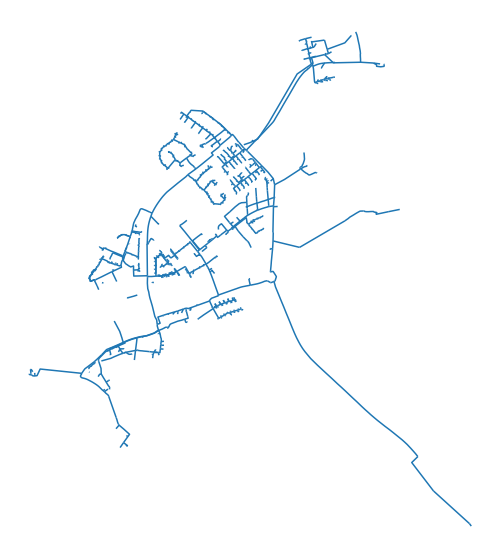

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
wdn.plot(ax=ax)
ax.set_axis_off()
plt.show()

We have to convert this LineString geopandas dataframe (geo-dataframe, `gdf`) to `networkx.Graph`.<br> 
We use `momepy.gdf_to_nx` to convert geo-dataframe to `networkx`graph.<br>
To convert a graph back to a geo-dataframe one uses `momepy.nx_to_gdf`. 
The former, `gdf_to_nx`, supports both primal and dual graphs. <br>

- **Primal** approach will save length of each segment to be used as a weight later
- **Dual** will save the angle between segments (allowing angular centrality).

Let's go with the *primal* approach for now and see how it goes

In [5]:
graph = momepy.gdf_to_nx(wdn, approach='primal')

1. We'll plot the base geometry from the shapefile contained in the geo-dataframe
2. The graph constructed from the geo-dataframe
3. An overlay of the graph on the actual WDN

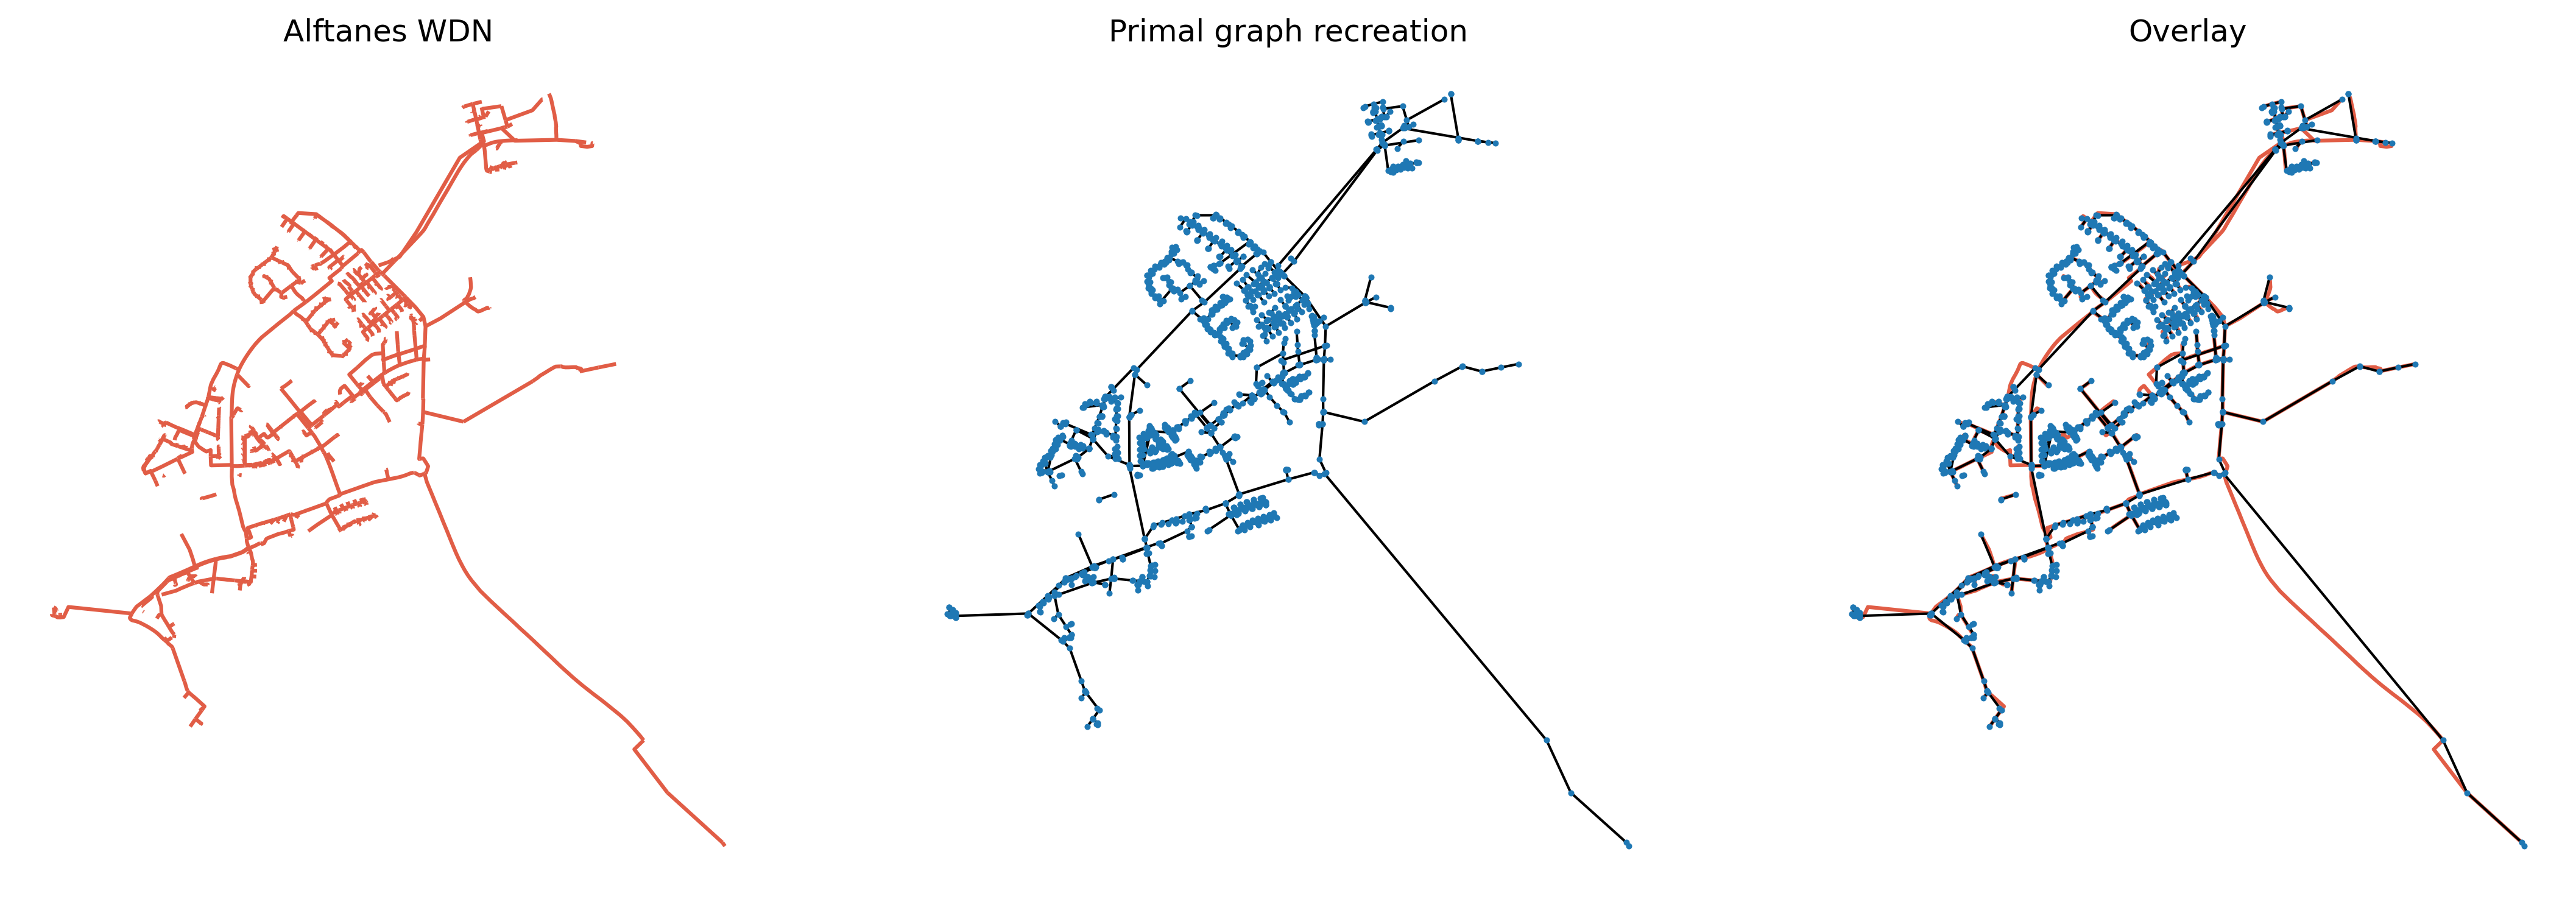

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, dpi = 300)

# Base network from geo-dataframe:
wdn.plot(color='#e15d46', ax=ax[0])

for i, subplot in enumerate(ax):
    subplot.set_title(("Alftanes WDN", "Primal graph recreation", "Overlay")[i])
    subplot.axis("off")
    

nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[1], node_size=2)
wdn.plot(color='#e15d46', ax=ax[2], zorder=-1)
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=ax[2], node_size=2)

Count the number of nodes and edges, judging by the geo-dataframe, there should be $1710$ pipes in total

In [7]:
print("No. of nodes:\t{}".format(graph.number_of_nodes()))
print("No. of edges:\t{}".format(graph.number_of_edges()))

No. of nodes:	1808
No. of edges:	1710


Yup, this checks out!

Let's plot again in hi-res so we can investigate the graph relative to the base network:

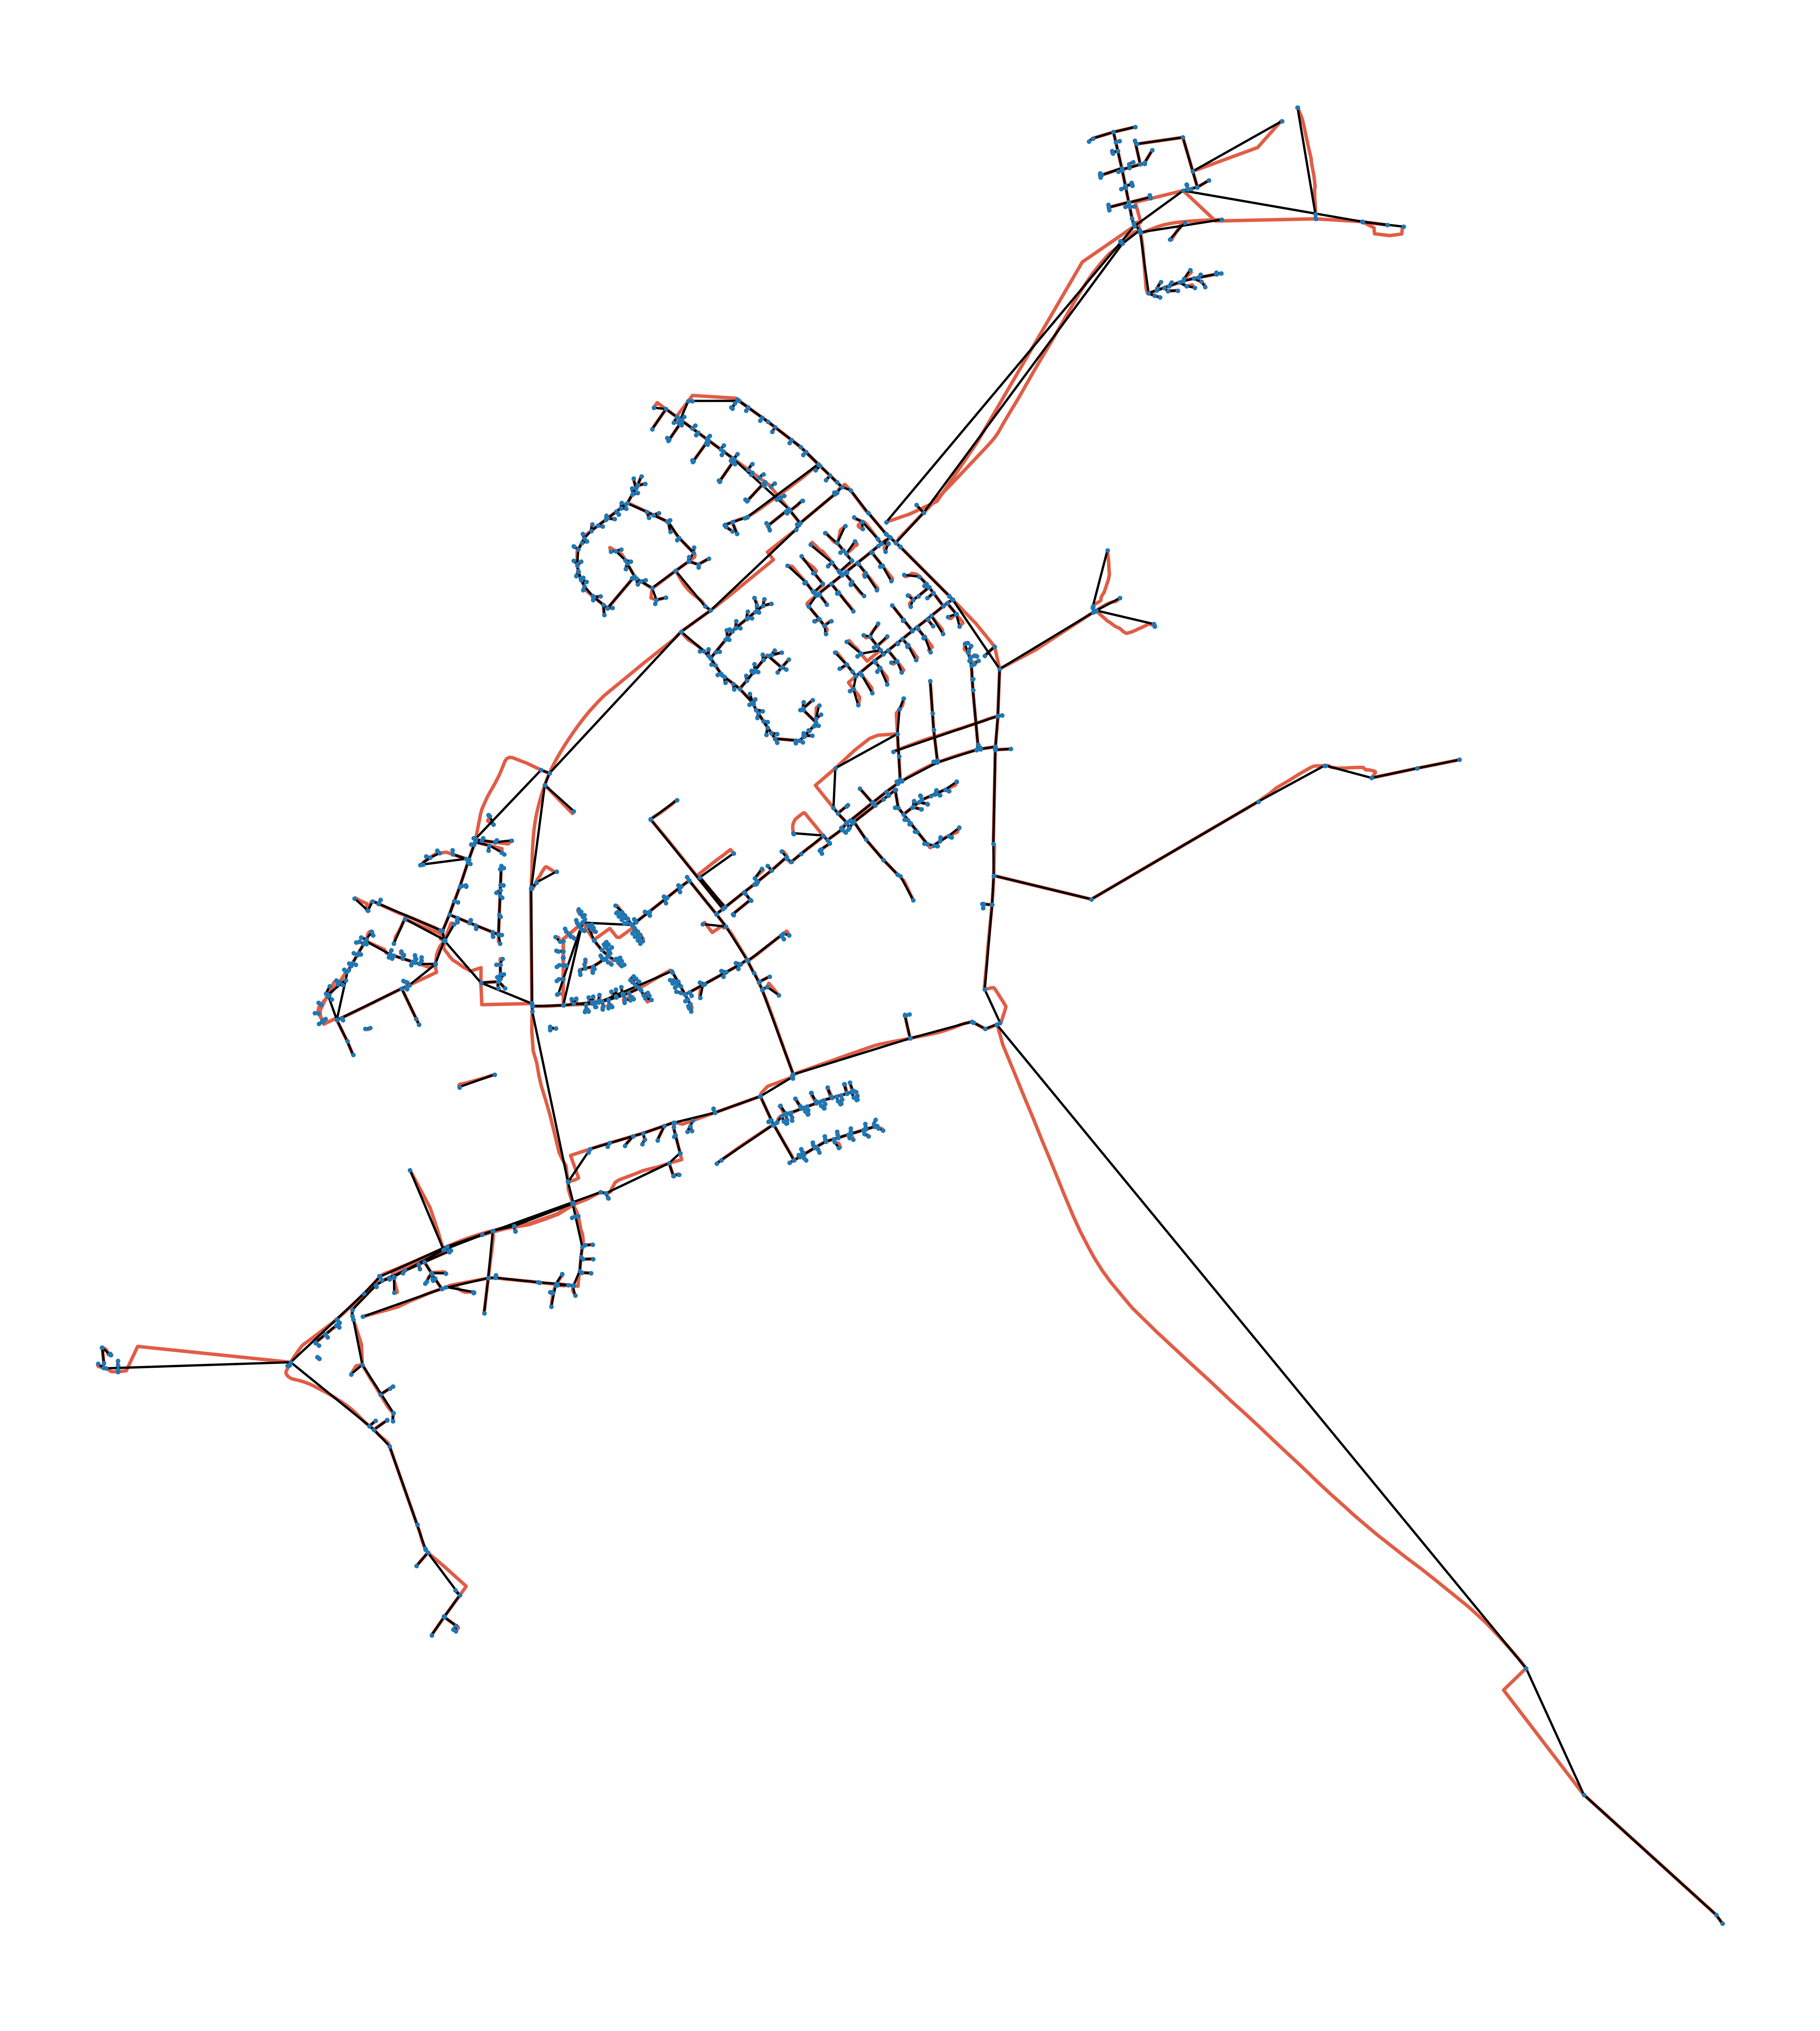

In [8]:
plt.figure(figsize=(16,16),dpi=400)
wdn.plot(color='#e15d46', ax=plt.gca(), zorder=-1)
nx.draw(graph, {n:[n[0], n[1]] for n in list(graph.nodes)}, ax=plt.gca(), node_size=1)